# AI ALGORITHM TO PREDICT THE BUS VOLTAGE
 The algorithm predicts the bus voltage V2 and V3 along with DELTA2 and DELTA3.

# Importing all the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error

from sklearn.tree import export_graphviz
from IPython.display import Image
from six import StringIO
import pydotplus

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Loading the dataset into the dataframe

In [2]:
data = pd.read_csv("TRAINING DATA.csv")

In [3]:
data.head()

,S,G,PL_2,PL_3,Q2,Q3,V2,V3,DELTA_2,DELTA_3
0,13.0,600,0.416874,0.291812,0.3,0.4,1.003,1.009,-0.745,-0.538
1,13.0,600,0.425382,0.297767,0.3,0.4,1.002,1.009,-0.795,-0.574
2,13.0,600,0.434063,0.303844,0.3,0.4,1.002,1.009,-0.848,-0.610
3,13.0,600,0.442921,0.310045,0.3,0.4,1.002,1.009,-0.900,-0.650
4,13.0,600,0.451960,0.316372,0.3,0.4,1.002,1.009,-0.959,-0.690


# Total no.of rows and columns

In [4]:
data.shape

(725, 10)

# Checking the types of data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725 entries, 0 to 724
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   S        725 non-null    float64
 1   G        725 non-null    int64  
 2   PL_2     725 non-null    float64
 3   PL_3     725 non-null    float64
 4   Q2       725 non-null    float64
 5   Q3       725 non-null    float64
 6   V2       725 non-null    float64
 7   V3       725 non-null    float64
 8   DELTA_2  725 non-null    float64
 9   DELTA_3  725 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 56.8 KB


# DATA PRE-PROCESSING

# Checking for duplicates

In [6]:
data.duplicated().sum()

555

# Checking for missing values

In [7]:
data.isnull().sum()

S          0
G          0
PL_2       0
PL_3       0
Q2         0
Q3         0
V2         0
V3         0
DELTA_2    0
DELTA_3    0
dtype: int64

# Finding the outliers in data

In [8]:
# Function to identify the outliers
def findoutliers(column):
    outliers=[]
    Q1=column.quantile(.25)
    Q3=column.quantile(.75)
    IQR=Q3-Q1
    lower_limit=Q1-(1.5*IQR)
    upper_limit=Q3+(1.5*IQR)
    for out1 in column:
        if out1>upper_limit or out1 <lower_limit:
            outliers.append(out1)
            
    return np.array(outliers)  

In [9]:
print(len(findoutliers(data.S))) # Number of outlier

4


In [10]:
print(len(findoutliers(data.G))) # Number of outlier

0


In [11]:
print(len(findoutliers(data.PL_2))) # Number of outlier

0


In [12]:
print(len(findoutliers(data.PL_3))) # Number of outlier

67


In [13]:
print(len(findoutliers(data.Q2))) # Number of outlier

0


In [14]:
print(len(findoutliers(data.Q3))) # Number of outlier

52


# EXPLORATORY DATA ANALYSIS

# Statistical information describe

In [15]:
data.describe()

,S,G,PL_2,PL_3,Q2,Q3,V2,V3,DELTA_2,DELTA_3
count,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000
mean,8.132138,338.427586,0.457952,0.434011,0.355259,0.417572,0.997015,1.003217,-0.600429,-0.776087
std,4.644255,278.245637,0.250899,0.189183,0.244584,0.170322,0.028927,0.020136,1.003272,0.619594
min,0.900000,6.000000,0.045000,0.114000,0.024000,0.093000,0.920000,0.937000,-2.343000,-2.786000
25%,4.000000,28.000000,0.200000,0.343000,0.130000,0.315000,0.991000,0.999000,-1.297000,-1.144000
50%,7.200000,320.000000,0.500000,0.350000,0.300000,0.400000,1.000000,1.006000,-0.794000,-0.819000
75%,13.000000,600.000000,0.570000,0.500000,0.498000,0.476000,1.018000,1.014000,-0.066000,-0.601000
max,27.000000,1000.000000,1.000000,1.000000,0.930000,0.930000,1.053000,1.044000,2.560000,1.334000


# Visualising the outliers

Text(0.5, 1.0, 'BOXPLOT OF S')

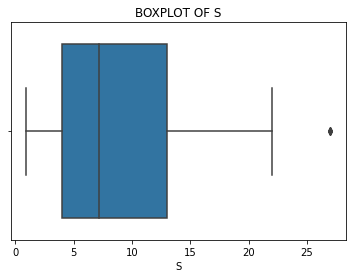

In [16]:
sn.boxplot(data.S, orient='v')
plt.title('BOXPLOT OF S')

Text(0.5, 1.0, 'BOXPLOT OF G')

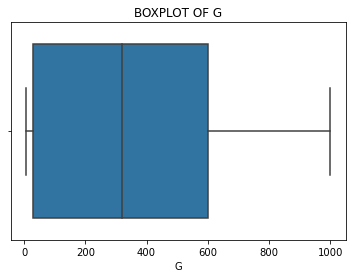

In [17]:
sn.boxplot(data.G, orient='v')
plt.title('BOXPLOT OF G')

Text(0.5, 1.0, 'BOXPLOT OF PL_2')

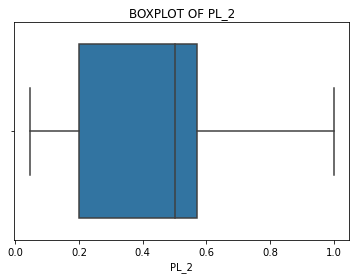

In [18]:
sn.boxplot(data.PL_2, orient='v')
plt.title('BOXPLOT OF PL_2')

Text(0.5, 1.0, 'BOXPLOT OF PL_3')

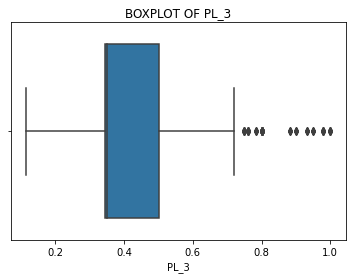

In [19]:
sn.boxplot(data.PL_3, orient='v')
plt.title('BOXPLOT OF PL_3')

Text(0.5, 1.0, 'BOXPLOT OF Q2')

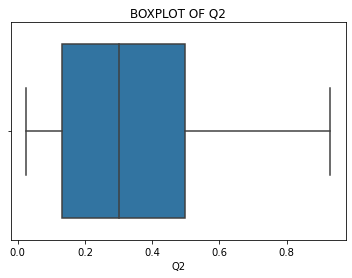

In [20]:
sn.boxplot(data.Q2, orient='v')
plt.title('BOXPLOT OF Q2')

Text(0.5, 1.0, 'BOXPLOT OF Q3')

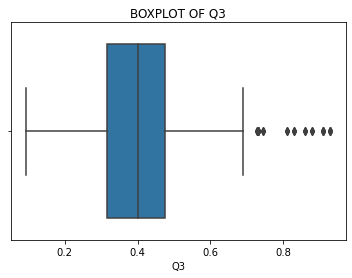

In [21]:
sn.boxplot(data.Q3, orient='v')
plt.title('BOXPLOT OF Q3')

# Visualising the features

Text(0.5, 1.0, 'DISTRIBUTION PLOT OF S')

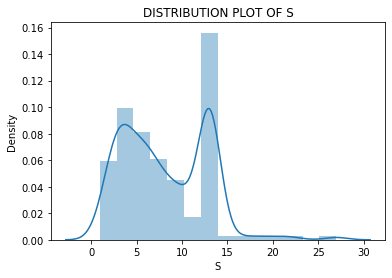

In [22]:
sn.distplot(data.S)
plt.title('DISTRIBUTION PLOT OF S')

### The data is normally distributed.

Text(0.5, 1.0, 'DISTRIBUTION PLOT OF G')

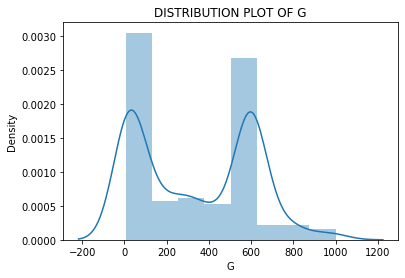

In [23]:
sn.distplot(data.G)
plt.title('DISTRIBUTION PLOT OF G')

### The data is normally distributed.

Text(0.5, 1.0, 'DISTRIBUTION PLOT OF PL_2')

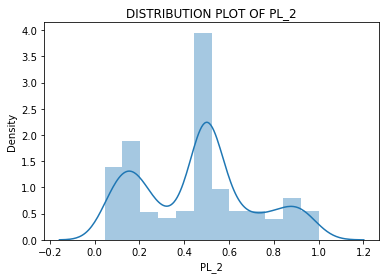

In [24]:
sn.distplot(data.PL_2)
plt.title('DISTRIBUTION PLOT OF PL_2')

### The data is normally distributed.

Text(0.5, 1.0, 'DISTRIBUTION PLOT OF PL_3')

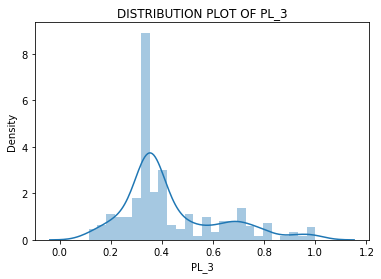

In [25]:
sn.distplot(data.PL_3)
plt.title('DISTRIBUTION PLOT OF PL_3')

### The data is not normally distributed. There seem to be positive skewness.

Text(0.5, 1.0, 'DISTRIBUTION PLOT OF Q2')

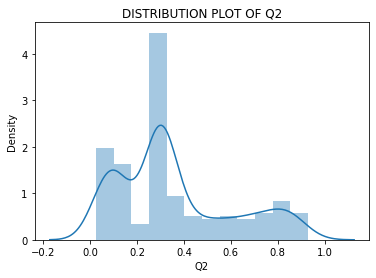

In [26]:
sn.distplot(data.Q2)
plt.title('DISTRIBUTION PLOT OF Q2')

### The data is not normally distributed. There seem to be positive skewness.

Text(0.5, 1.0, 'DISTRIBUTION PLOT OF Q3')

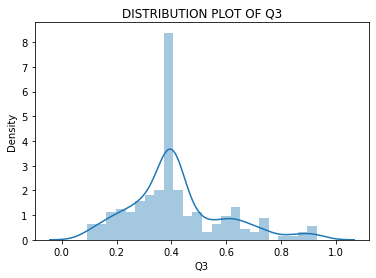

In [27]:
sn.distplot(data.Q3)
plt.title('DISTRIBUTION PLOT OF Q3')

### The data is not normally distributed. There seem to be positive skewness.

# Visualising the targets

<AxesSubplot:xlabel='V2', ylabel='Density'>

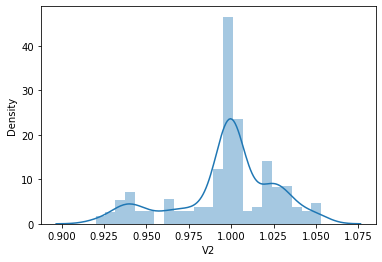

In [28]:
sn.distplot(data.V2)

### The data is not normally distributed. There seem to be slight negative skewness.

<AxesSubplot:xlabel='V3', ylabel='Density'>

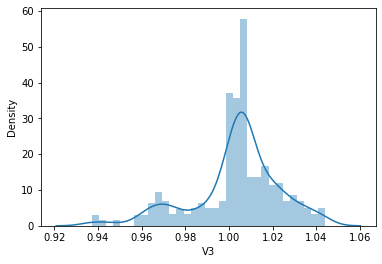

In [29]:
sn.distplot(data.V3)

### The data is not normally distributed. There seem to be slight negative skewness.

<AxesSubplot:xlabel='DELTA_2', ylabel='Density'>

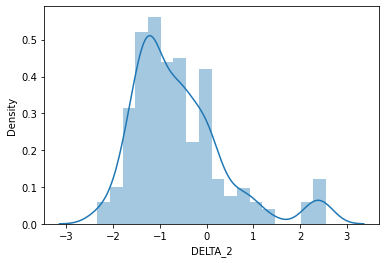

In [30]:
sn.distplot(data.DELTA_2)

### The data is not normally distributed. There seem to be positive skewness.

<AxesSubplot:xlabel='DELTA_3', ylabel='Density'>

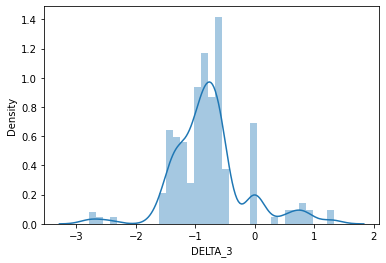

In [31]:
sn.distplot(data.DELTA_3)

### The data is normally distributed.

## Regression Plots

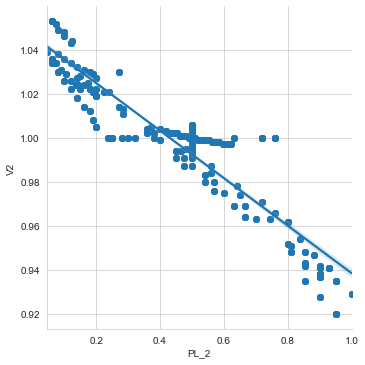

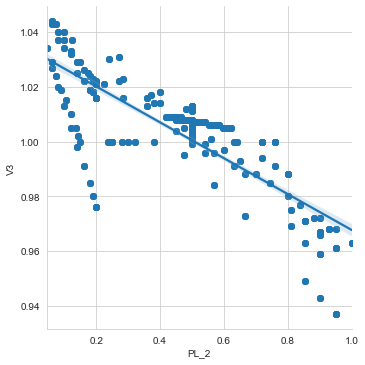

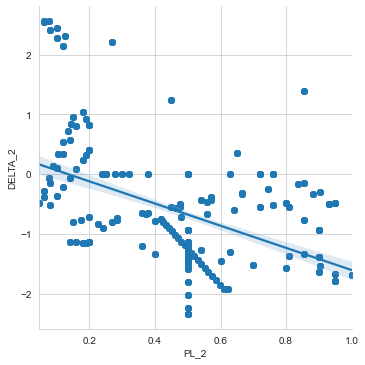

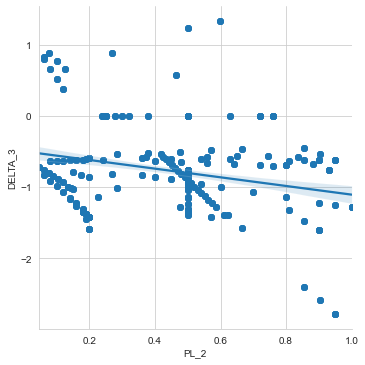

In [32]:
sn.set_style('whitegrid')
sn.lmplot(x ='PL_2', y ='V2', data = data)
sn.lmplot(x ='PL_2', y ='V3', data = data)
sn.lmplot(x ='PL_2', y ='DELTA_2', data = data)
sn.lmplot(x ='PL_2', y ='DELTA_3', data = data)

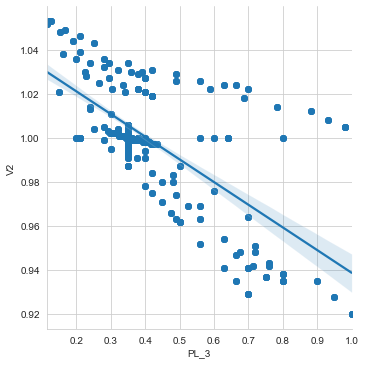

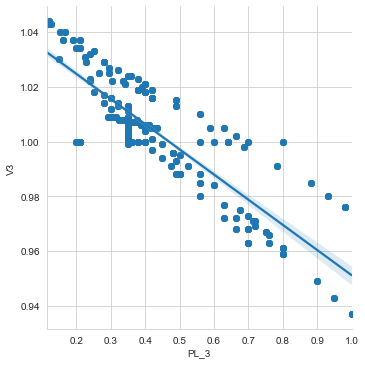

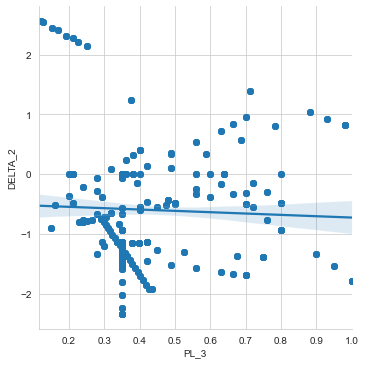

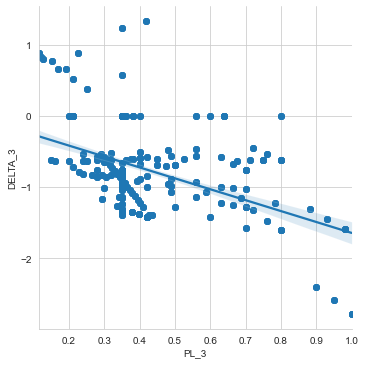

In [33]:
sn.set_style('whitegrid')
sn.lmplot(x ='PL_3', y ='V2', data = data)
sn.lmplot(x ='PL_3', y ='V3', data = data)
sn.lmplot(x ='PL_3', y ='DELTA_2', data = data)
sn.lmplot(x ='PL_3', y ='DELTA_3', data = data)

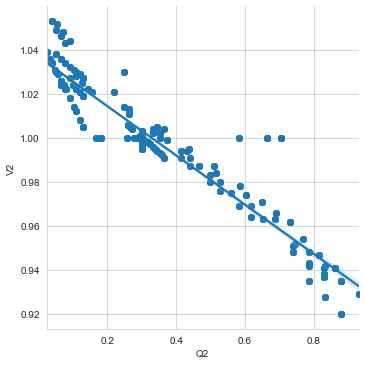

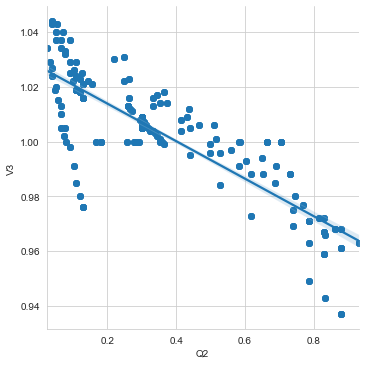

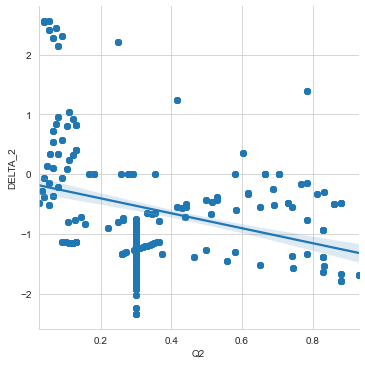

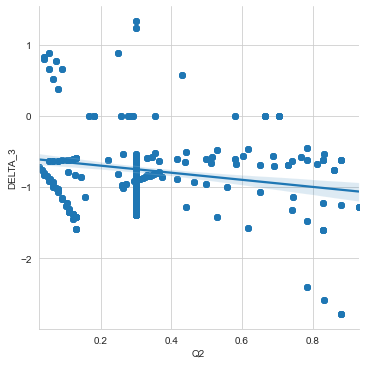

In [34]:
sn.set_style('whitegrid')
sn.lmplot(x ='Q2', y ='V2', data = data)
sn.lmplot(x ='Q2', y ='V3', data = data)
sn.lmplot(x ='Q2', y ='DELTA_2', data = data)
sn.lmplot(x ='Q2', y ='DELTA_3', data = data)

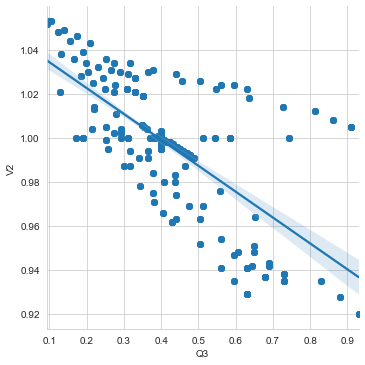

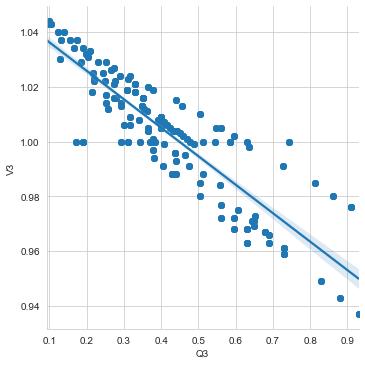

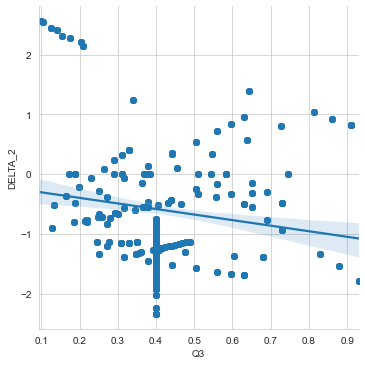

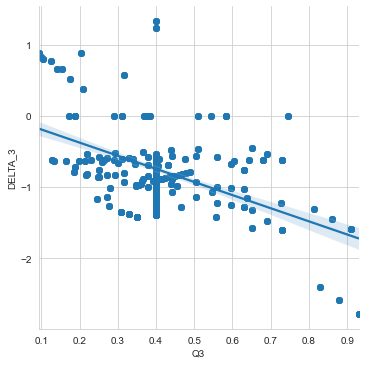

In [35]:
sn.set_style('whitegrid')
sn.lmplot(x ='Q3', y ='V2', data = data)
sn.lmplot(x ='Q3', y ='V3', data = data)
sn.lmplot(x ='Q3', y ='DELTA_2', data = data)
sn.lmplot(x ='Q3', y ='DELTA_3', data = data)

# Correlation using heatmap

In [36]:
data.corr()

,S,G,PL_2,PL_3,Q2,Q3,V2,V3,DELTA_2,DELTA_3
S,1.000000,0.532254,0.440508,0.195727,0.209306,0.405835,-0.310219,-0.340491,-0.447685,-0.284786
G,0.532254,1.000000,0.648628,0.079731,0.489575,0.226864,-0.503130,-0.339679,-0.441854,0.031249
PL_2,0.440508,0.648628,1.000000,0.554022,0.951897,0.606505,-0.934919,-0.815404,-0.463606,-0.246466
PL_3,0.195727,0.079731,0.554022,1.000000,0.611930,0.959569,-0.672900,-0.863057,-0.042188,-0.468175
Q2,0.209306,0.489575,0.951897,0.611930,1.000000,0.604840,-0.944906,-0.832591,-0.304549,-0.196350
Q3,0.405835,0.226864,0.606505,0.959569,0.604840,1.000000,-0.691798,-0.879141,-0.157874,-0.507075
V2,-0.310219,-0.503130,-0.934919,-0.672900,-0.944906,-0.691798,1.000000,0.928860,0.430506,0.374450
V3,-0.340491,-0.339679,-0.815404,-0.863057,-0.832591,-0.879141,0.928860,1.000000,0.293875,0.459685
DELTA_2,-0.447685,-0.441854,-0.463606,-0.042188,-0.304549,-0.157874,0.430506,0.293875,1.000000,0.563034
DELTA_3,-0.284786,0.031249,-0.246466,-0.468175,-0.196350,-0.507075,0.374450,0.459685,0.563034,1.000000


<AxesSubplot:>

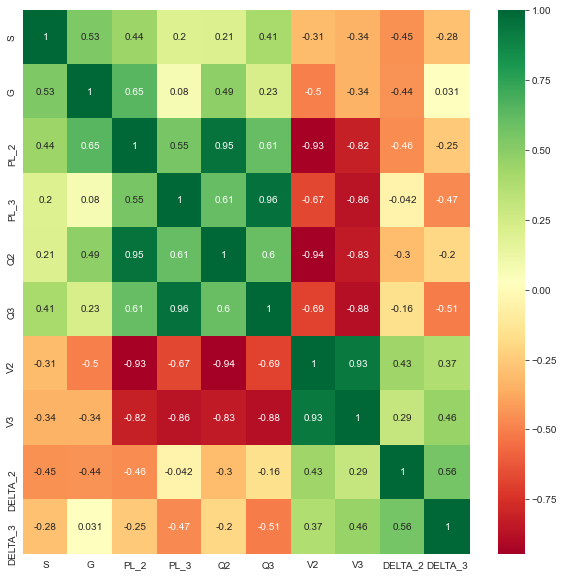

In [37]:
plt.figure(figsize=(10,10))
sn.heatmap(data.corr(),annot=True,cmap="RdYlGn")

### Good correlation with targets and Q3 and Q2 are dependent, PL_2 and PL_3 are dependent otherwise not much multicolinearity among features.

# Defining independent and dependent

In [38]:
X = data.iloc[:,[0,1,2,3,4,5]]
y = data.iloc[:,[6,7,8,9]]

# Spliting the data into training and testing data

In [39]:
x_train, x_test, y_train, y_test = train_test_split( X, y, train_size = 0.8, random_state = 23)

# Decision Tree

In [40]:
model_dt = DecisionTreeRegressor()

# Training the model

In [41]:
model_dt.fit(x_train,y_train)

DecisionTreeRegressor()

# Testing the model

In [42]:
y_predict_dt = model_dt.predict(x_test)

In [43]:
mean_squared_error(y_test,y_predict_dt)

1.4137931034482785e-07

In [44]:
r2_dt = r2_score(y_test,y_predict_dt)
r2_dt

0.9999997499219234

In [45]:
mae_dt = mean_absolute_percentage_error(y_test,y_predict_dt)
mae_dt

2.706694081097203e-05

# Random Forest

In [46]:
model_rf = RandomForestRegressor()

# Training the model

In [47]:
model_rf.fit(x_train,y_train)

RandomForestRegressor()

# Testing the model

In [48]:
y_predict_rf = model_rf.predict(x_test)

In [49]:
mean_squared_error(y_test,y_predict_rf)

0.0017732282821303208

In [50]:
r2_rf = r2_score(y_test,y_predict_rf)
r2_rf

0.9962092640875309

In [51]:
mae_rf = mean_absolute_percentage_error(y_test, y_predict_rf)
mae_rf

13310078105615.758

# KNN

In [52]:
model_knn = KNeighborsRegressor()

# Training the model

In [53]:
model_knn.fit(x_train,y_train)

KNeighborsRegressor()

# Testing the model

In [54]:
y_predict_knn = model_knn.predict(x_test)

In [55]:
mean_squared_error(y_test,y_predict_knn)

0.07555723255999998

In [56]:
r2_knn = r2_score(y_test,y_predict_knn)
r2_knn

0.8280844584599654

In [57]:
mae_knn = mean_absolute_percentage_error(y_test, y_predict_knn)
mae_knn

53661166042813.94

# Model Evaluation

In [58]:
Mean_Absolute_Percentage_Error = [mae_dt,mae_rf,mae_knn]
R2_Score = [r2_dt,r2_rf,r2_knn]
Models = ['Decision Tree', 'Random Forest', 'KNN']

# Mean Absolute Percentage Error Comparison Chart

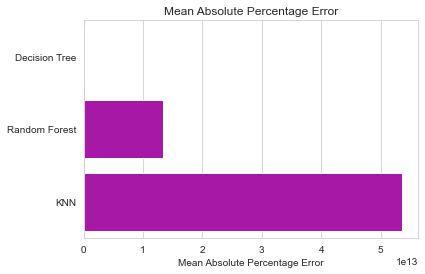

In [59]:
sn.barplot(Mean_Absolute_Percentage_Error, Models, color="m")
plt.xlabel('Mean Absolute Percentage Error')
plt.title('Mean Absolute Percentage Error')
plt.show()

# R2 Score Comparison Chart

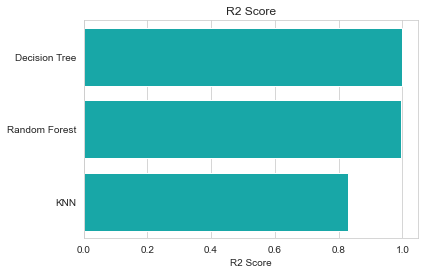

In [60]:
sn.barplot(R2_Score, Models, color="c")
plt.xlabel('R2 Score')
plt.title('R2 Score')
plt.show()

### From the charts it can be seen that the Mean Absolute Percentage Error is lowest for Decision tree and the R2 Score is highest for Decision tree. Therefore, we can conclude that random forest is the best algorithm for this data. 

# Regression plot for decision tree

In [61]:
y_predict_dt = pd.DataFrame(y_predict_dt)
y_predict_dt.columns = ['V2', 'V3', 'DELTA_2', 'DELTA_3']
y_predict_dt.head()

,V2,V3,DELTA_2,DELTA_3
0,1.002,1.008,-0.929,-0.762
1,0.983,0.996,-0.437,-0.950
2,0.996,1.004,-1.195,-0.851
3,0.980,0.996,-0.438,-0.485
4,1.036,1.034,-0.370,-0.631


Text(0.5, 1.0, 'V2_actual vs V2_predict')

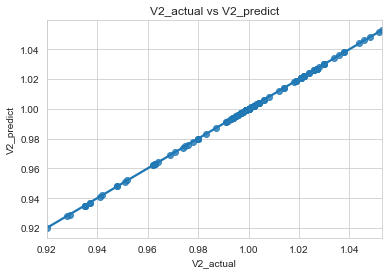

In [62]:
sn.regplot(x = y_test.V2, y = y_predict_dt.V2)
plt.xlabel('V2_actual')
plt.ylabel('V2_predict')
plt.title('V2_actual vs V2_predict')

Text(0.5, 1.0, 'V3_actual vs V3_predict')

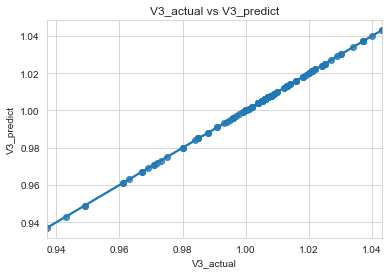

In [63]:
sn.regplot(x = y_test.V3, y = y_predict_dt.V3)
plt.xlabel('V3_actual')
plt.ylabel('V3_predict')
plt.title('V3_actual vs V3_predict')

Text(0.5, 1.0, 'VDEALTA_2_actual vs DEALTA_2_predict')

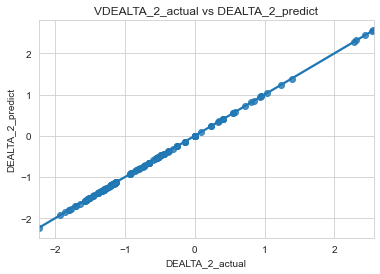

In [64]:
sn.regplot(x = y_test.DELTA_2, y = y_predict_dt.DELTA_2)
plt.xlabel('DEALTA_2_actual')
plt.ylabel('DEALTA_2_predict')
plt.title('VDEALTA_2_actual vs DEALTA_2_predict')

Text(0.5, 1.0, 'VDEALTA_3_actual vs DEALTA_3_predict')

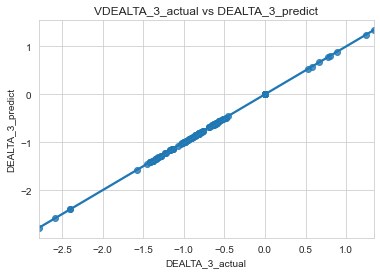

In [65]:
sn.regplot(x = y_test.DELTA_3, y = y_predict_dt.DELTA_3)
plt.xlabel('DEALTA_3_actual')
plt.ylabel('DEALTA_3_predict')
plt.title('VDEALTA_3_actual vs DEALTA_3_predict')

# Visualising the decision tree

In [66]:
node_data = StringIO()
export_graphviz(model_dt, out_file = node_data)
graph = pydotplus.graph_from_dot_data(node_data.getvalue())

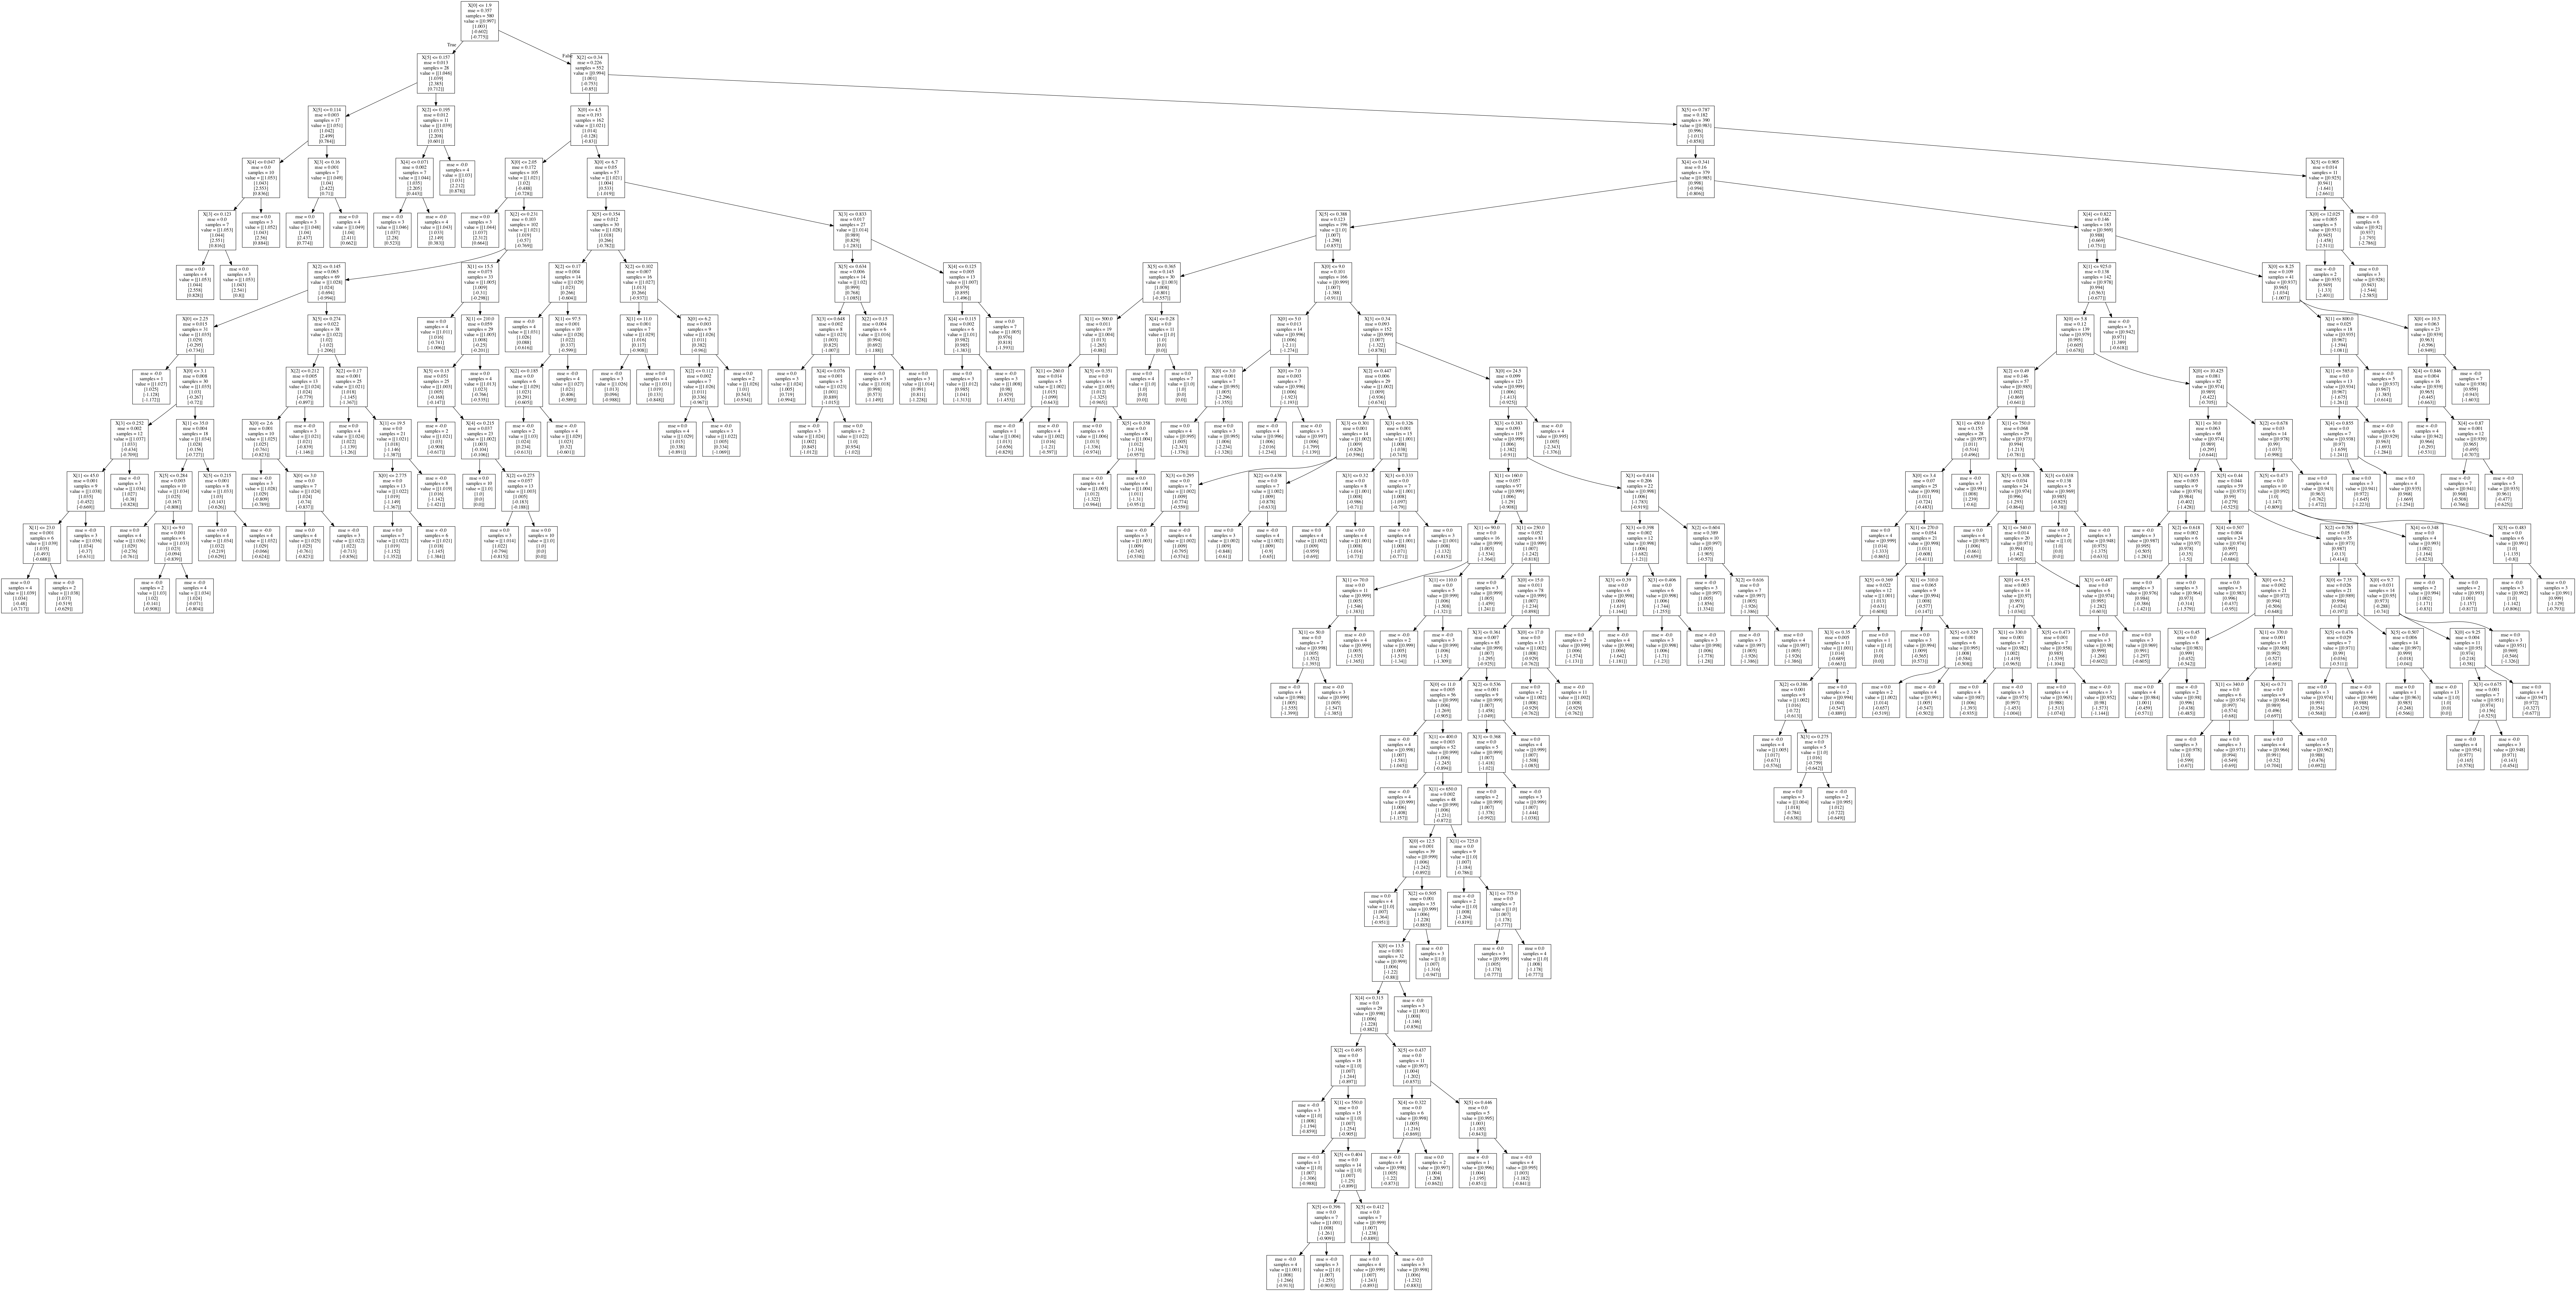

In [67]:
Image(graph.create_png())

# PREDICTING

In [74]:
pred = pd.read_csv("Predict Data.csv")
pred

,S,G,PL_2,PL_3,Q2,Q3
0,2.85,19,0.1900,0.3990,0.1200,0.3290
1,3.80,19,0.2375,0.3610,0.1675,0.2910
2,5.70,95,0.1900,0.3800,0.1200,0.3100
3,7.60,380,0.7600,0.4750,0.6900,0.4050
4,6.65,570,0.9500,0.6650,0.8800,0.5950
5,9.50,760,0.9025,0.7600,0.8325,0.6900
6,5.70,950,0.8550,0.7125,0.7850,0.6425
7,9.50,570,0.8835,0.6650,0.8135,0.5950
8,10.45,285,0.8550,0.7600,0.7850,0.6900
9,12.35,38,0.9025,0.9500,0.8325,0.8800


In [79]:
dt = model_dt.predict(pred)
dt = pd.DataFrame(dt)
dt.columns = ['V2', 'V3', 'DELTA_2', 'DELTA_3']
dt.to_csv("dt.csv")

In [80]:
rf = model_rf.predict(pred)
rf = pd.DataFrame(rf)
rf.columns = ['V2', 'V3', 'DELTA_2', 'DELTA_3']
rf.to_csv("rf.csv")

In [81]:
knn = model_knn.predict(pred)
knn = pd.DataFrame(knn)
knn.columns = ['V2', 'V3', 'DELTA_2', 'DELTA_3']
knn.to_csv("knn.csv")